In [132]:
import camb
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# Functions
def Cl(ombh2=0.022, omch2=0.12, h=0.67, ns=0.965, As=2.1e-9, tau=0.06, omk=0.0, w=-1, N_eff=3.046, TCMB=2.7255):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=h * 100, ombh2=ombh2, omch2=omch2, omk=omk, tau=tau, nnu=N_eff, TCMB=TCMB)
    pars.set_dark_energy(w=w)
    pars.InitPower.set_params(As=As, ns=ns)
    pars.set_for_lmax(10000, lens_potential_accuracy=0)
    
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    cl = powers['total']
    ell = np.arange(cl.shape[0])
    cl_normalized = cl[2:, 0] * ell[2:] * (ell[2:] + 1) / (2 * np.pi)

    return ell[2:], cl_normalized

def ombh2_func(Omega_m, h=0.67):
    return 0.16 * Omega_m * h**2

def omch2_func(Omega_m, h=0.67):
    return 0.84 * Omega_m * h**2

In [134]:
# Standard cosmology
x, y = Cl()

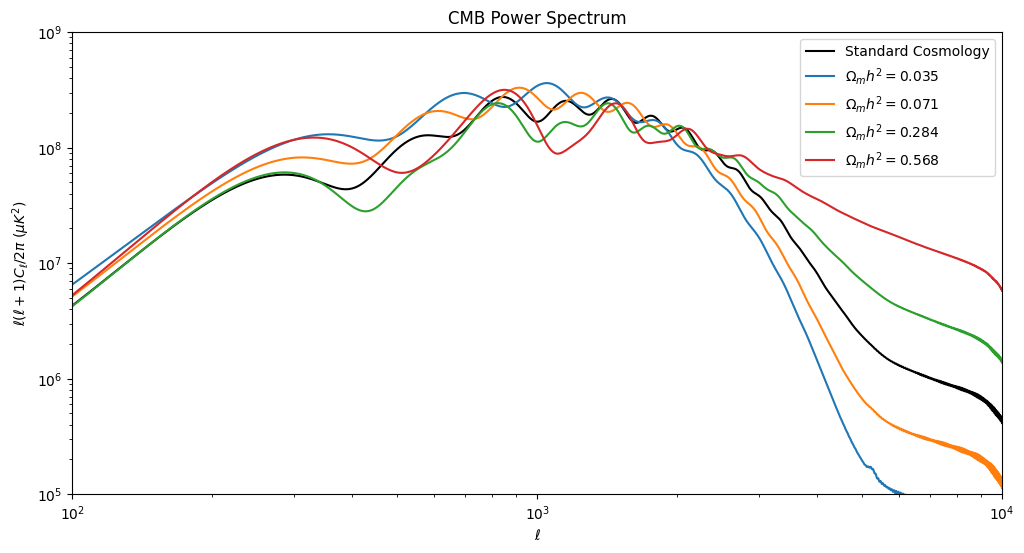

In [135]:
# Varying matter density
ombh2 = [0.022/4, 0.022/2, 0.022*2, 0.022*4]
omch2 = [0.12/4, 0.12/2, 0.12*2, 0.12*4]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(ombh2)):
    x_m, y_m = Cl(ombh2=ombh2[i], omch2=omch2[i])
    plt.loglog(x_m, y_m, label=r'$\Omega_m h^2 = %.3f$' % (ombh2[i] + omch2[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.title('CMB Power Spectrum')
plt.legend()
plt.savefig('Cl_Omega_m.png', dpi=240)
plt.show()

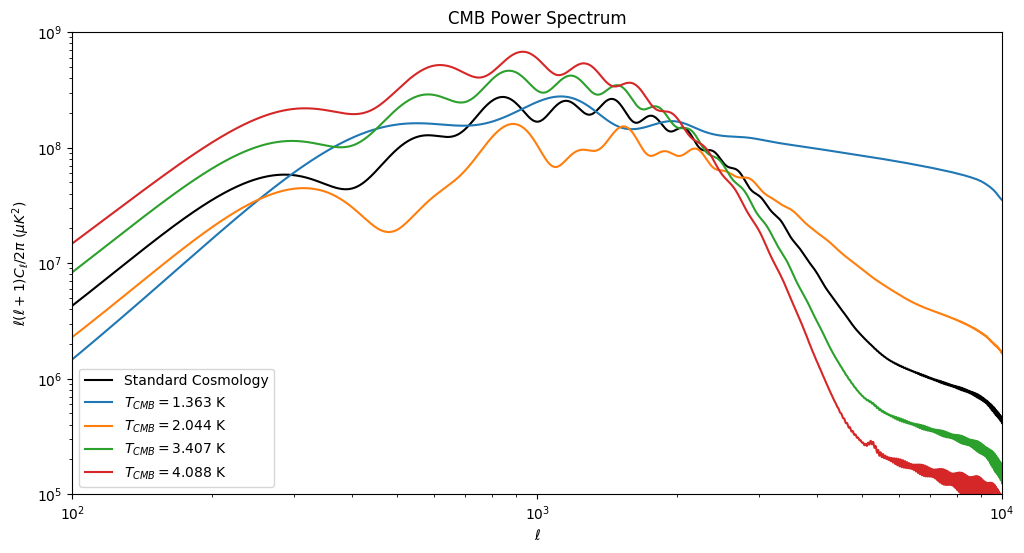

In [136]:
# Varying photon temperature
TCMB = [2.7255*0.5, 2.7255*0.75, 2.7255*1.25, 2.7255*1.5]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(TCMB)):
    x_T, y_T = Cl(TCMB=TCMB[i])
    plt.loglog(x_T, y_T, label=r'$T_{CMB} = %.3f$' % TCMB[i] + ' K')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend()
plt.savefig('Cl_TCMB.png', dpi=240)
plt.show()

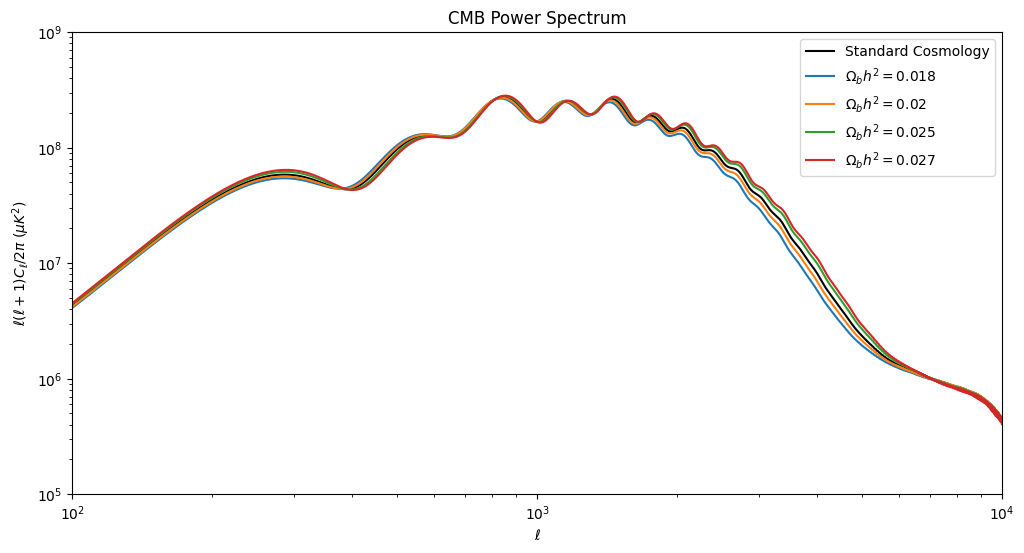

In [137]:
# Varying baryon density

b = [0.018, 0.020, 0.025, 0.027]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(b)):
    x_b, y_b = Cl(ombh2=b[i])
    plt.loglog(x_b, y_b, label=r'$\Omega_b h^2 = {}$'.format(b[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend()
plt.savefig('Cl_Omega_b.png', dpi=240)
plt.show()

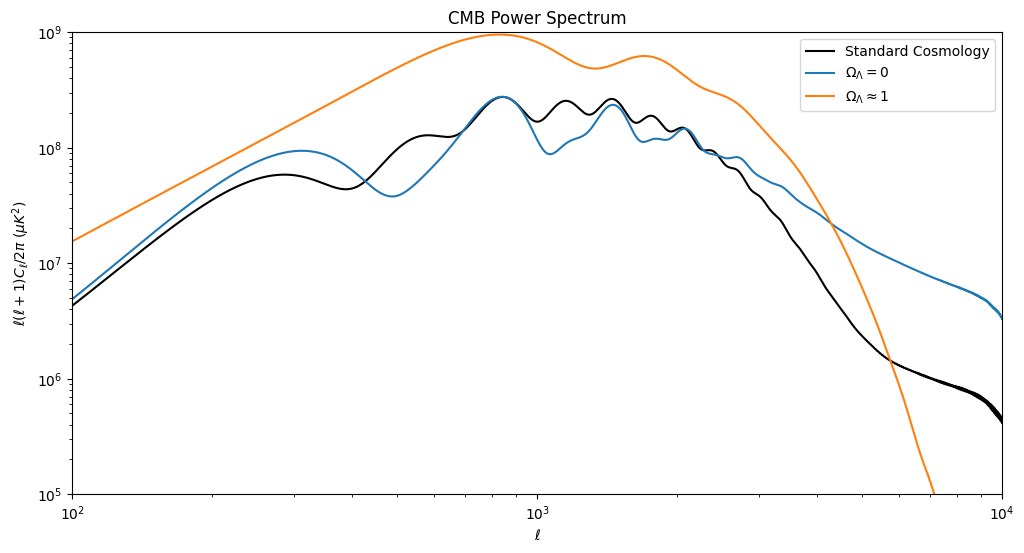

In [138]:
# Varying dark energy density

x_DE1, y_DE1 = Cl(ombh2=ombh2_func(1), omch2=omch2_func(1))
x_DE2, y_DE2 = Cl(ombh2=ombh2_func(0.01), omch2=omch2_func(0))

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
plt.loglog(x_DE1, y_DE1, label=r'$\Omega_\Lambda = 0$')
plt.loglog(x_DE2, y_DE2, label=r'$\Omega_\Lambda \approx 1$')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend()
plt.savefig('Cl_Omega_DE.png', dpi=240)
plt.show()

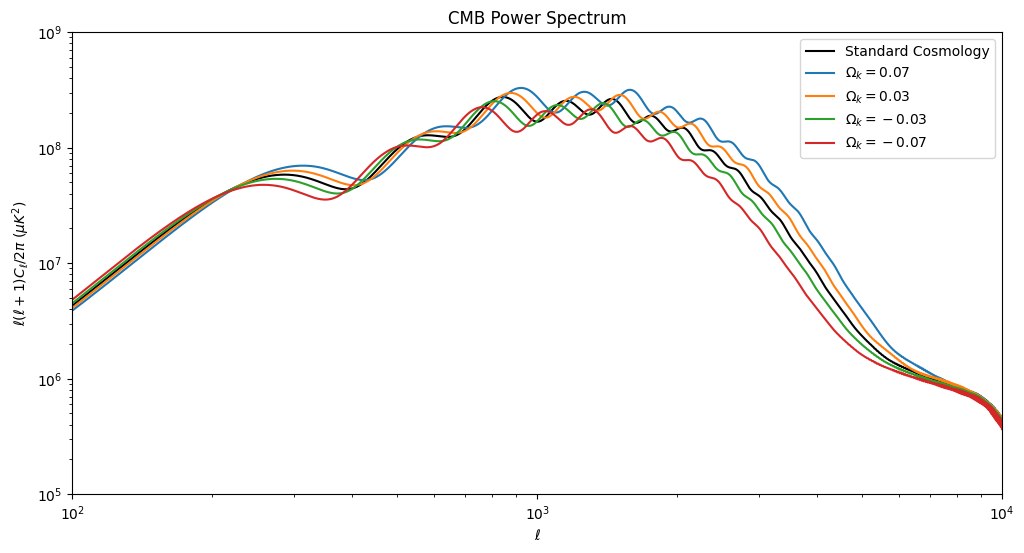

In [139]:
# Varying curvature density

omk = [0.07, 0.03, -0.03, -0.07]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(omk)):
    x_k, y_k = Cl(omk=omk[i])
    plt.loglog(x_k, y_k, label=r'$\Omega_k = {}$'.format(omk[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend()
plt.savefig('Cl_Omega_k.png', dpi=240)
plt.show()

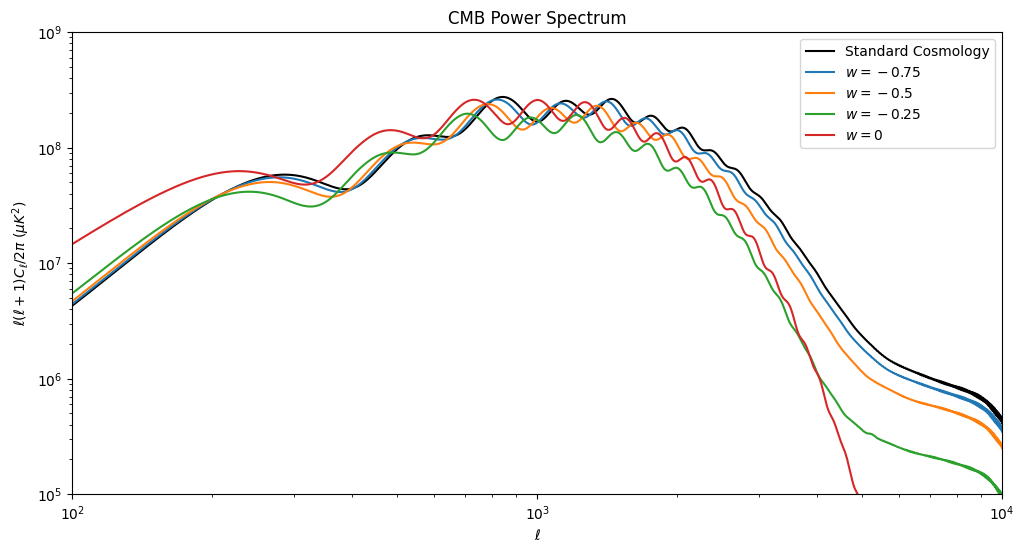

In [140]:
# Varying w
w = [-0.75, -0.5, -0.25, 0]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(w)):
    x_w, y_w = Cl(w=w[i])
    plt.loglog(x_w, y_w, label=r'$w = {}$'.format(w[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend()
plt.savefig('Cl_w.png', dpi=240)
plt.show()

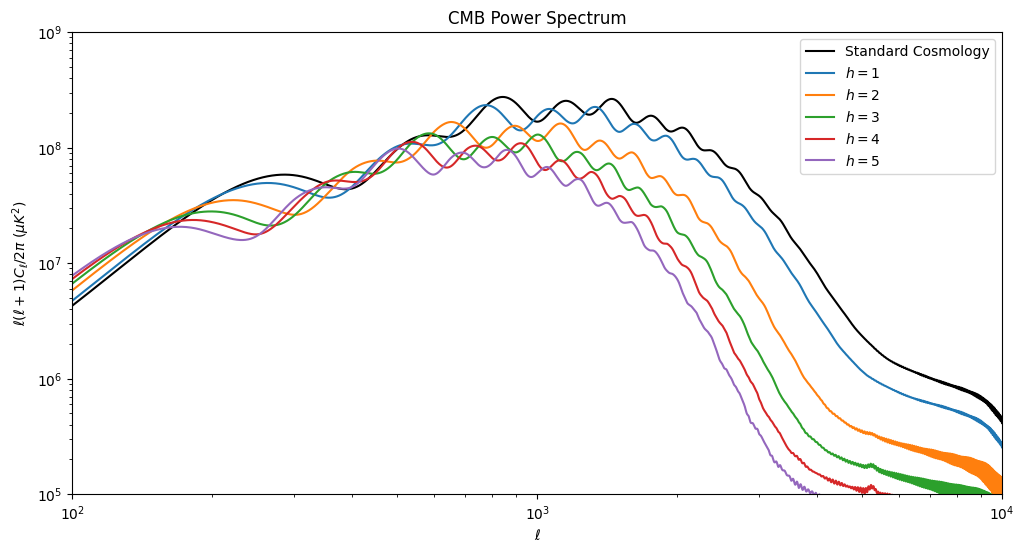

In [141]:
# Varying reduced hubble constant
h = [1, 2, 3, 4, 5]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(h)):
    x_h, y_h = Cl(h=h[i])
    plt.loglog(x_h, y_h, label=r'$h = {}$'.format(h[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend()
plt.savefig('Cl_h.png', dpi=240)
plt.show()

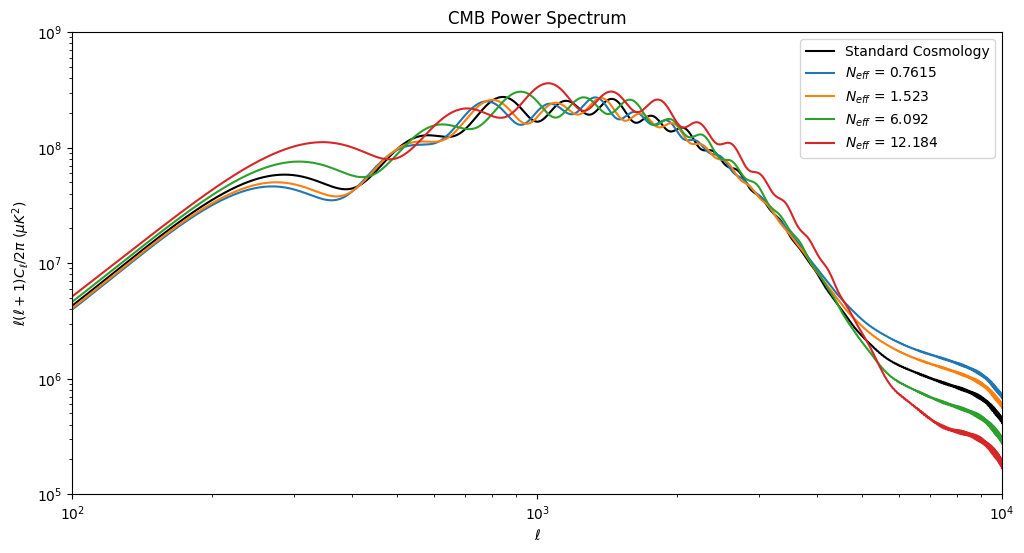

In [142]:
# Varying N_eff
N_eff = [3.046/4, 3.046/2, 3.046*2, 3.046*4]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(N_eff)):
    x_N, y_N = Cl(N_eff=N_eff[i])
    plt.loglog(x_N, y_N, label=r'$N_{eff}$' + ' = {}'.format(N_eff[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend()
plt.savefig('Cl_Neff.png', dpi=240)
plt.show()

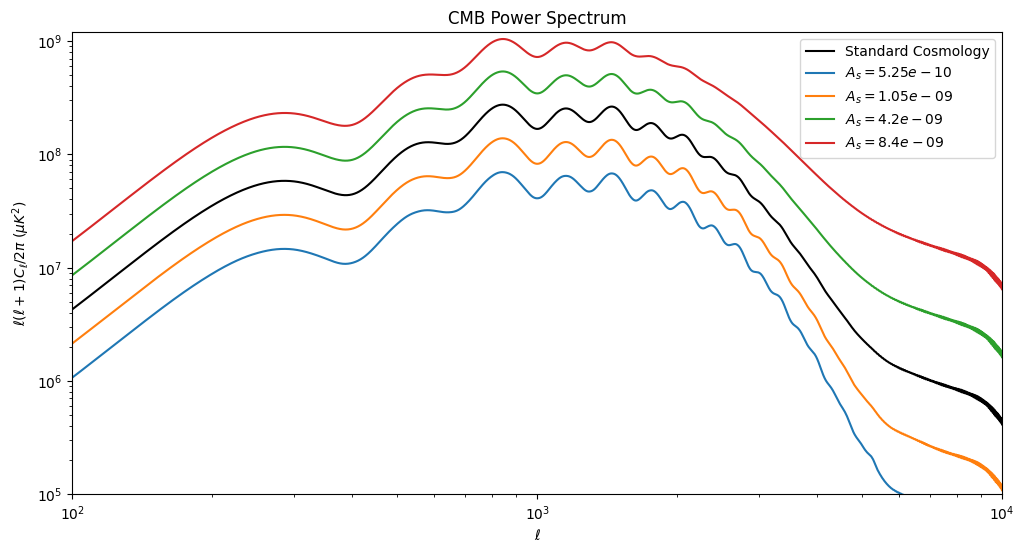

In [143]:
# Varying A_s

As = [2.1e-9/4, 2.1e-9/2, 2.1e-9*2, 2.1e-9*4]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(As)):
    x_A, y_A = Cl(As=As[i])
    plt.loglog(x_A, y_A, label=r'$A_s = {}$'.format(As[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1.2*1e9)
plt.legend()
plt.savefig('Cl_As.png', dpi=240)
plt.show()

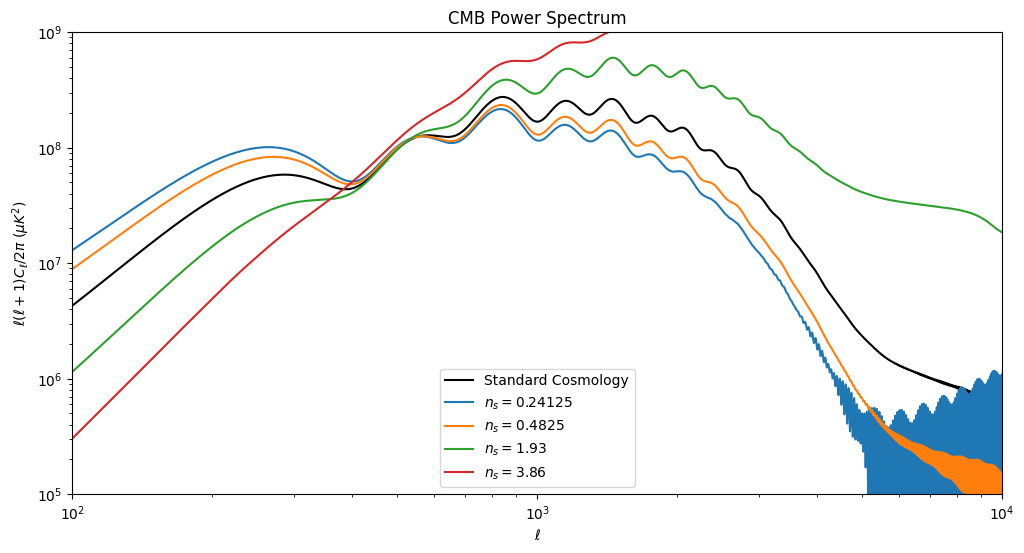

In [144]:
# Varying n_s

ns = [0.965/4, 0.965/2, 0.965*2, 0.965*4]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(ns)):
    x_ns, y_ns = Cl(ns=ns[i])
    plt.loglog(x_ns, y_ns, label=r'$n_s = {}$'.format(ns[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend()
plt.savefig('Cl_ns.png', dpi=240)
plt.show()

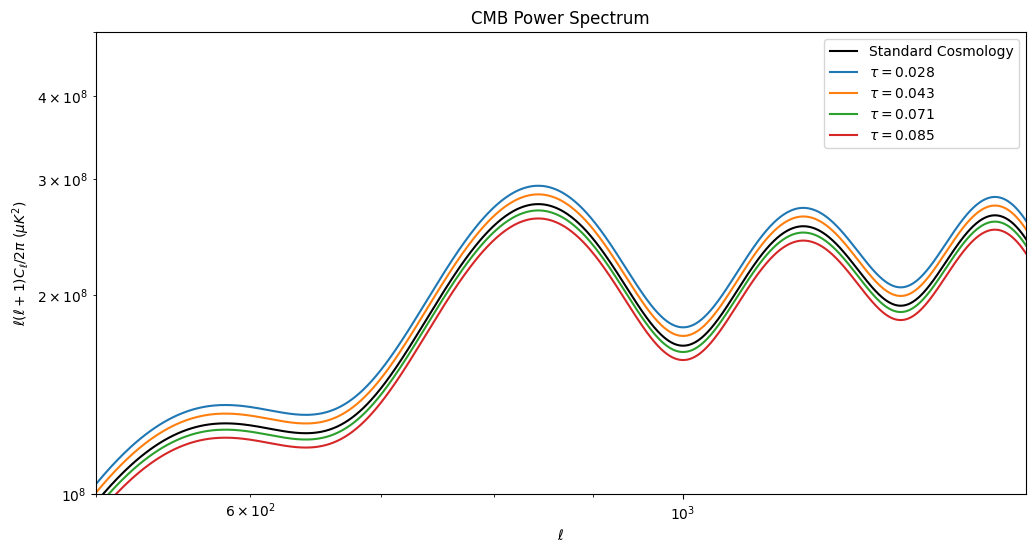

In [148]:
# Varying tau

tau = [0.028, 0.043, 0.071, 0.085]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(tau)):
    x_t, y_t = Cl(tau=tau[i])
    plt.loglog(x_t, y_t, label=r'$\tau = {}$'.format(tau[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(0.5*1e3,1.5*1e3)
plt.ylim(1e8,0.5*1e9)
plt.legend()
plt.savefig('Cl_tau.png', dpi=240)
plt.show()

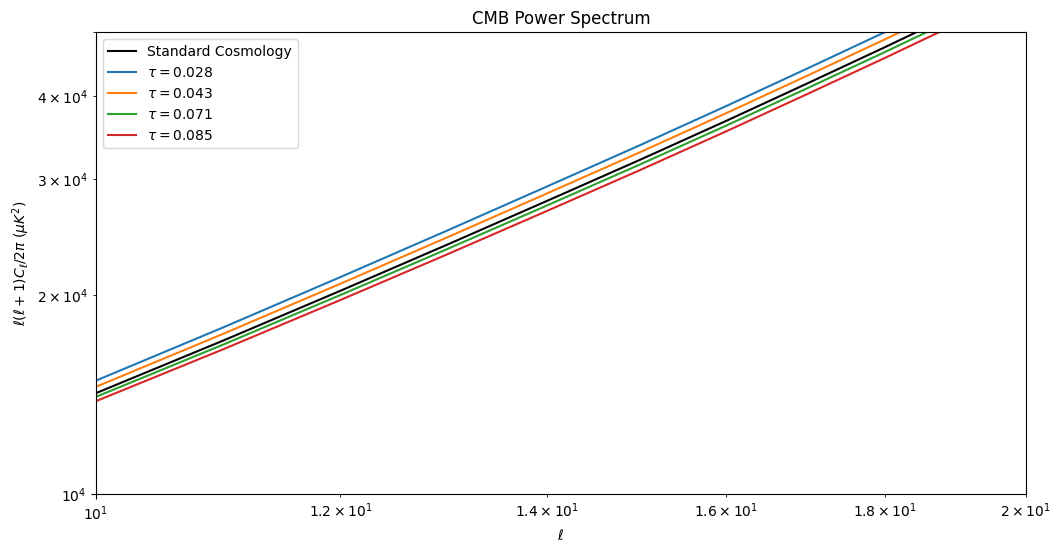

In [154]:
# Varying tau
tau = [0.028, 0.043, 0.071, 0.085]

plt.figure(figsize=(12, 6))
plt.loglog(x, y, color='black', label='Standard Cosmology')
for i in range(len(tau)):
    x_t, y_t = Cl(tau=tau[i])
    plt.loglog(x_t, y_t, label=r'$\tau = {}$'.format(tau[i]))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ ($\mu K^2$)')
plt.title('CMB Power Spectrum')
plt.xlim(10,20)
plt.ylim(1e4,0.5*1e5)
plt.legend()
plt.savefig('Cl_tau2.png', dpi=240)
plt.show()